## Importing Libraries

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

## Loading Data

In [4]:
df=pd.read_csv("C:\\Users\\IHSAN B P\\Desktop\\ibp\\natwest\\HealthApp_2k.log_structured.csv")
template=pd.read_csv("C:\\Users\\IHSAN B P\\Desktop\\ibp\\natwest\\HealthApp_2k.log_templates.csv")
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [6]:
#droping 'Pid' column
df = df.drop('Pid', axis = 1)
df.head()

,LineId,Time,Component,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,flush sensor data,E12,flush sensor data


## Total Steps Over Time for Event E22(number of steps)

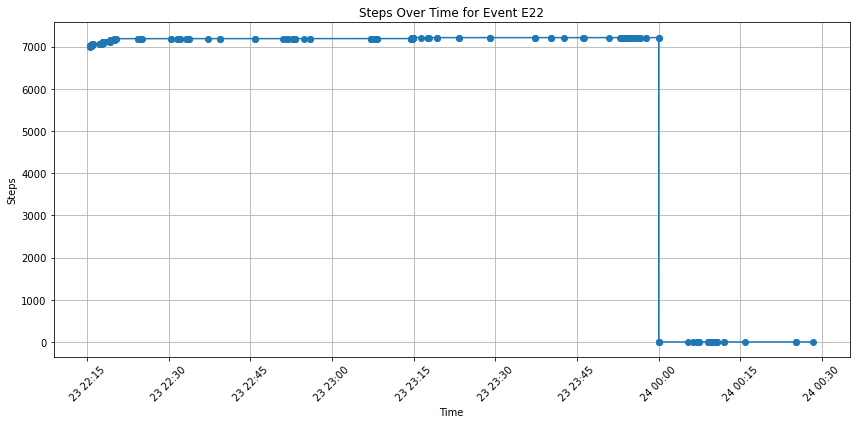

In [54]:
# Create a copy of the slice for safe modifications
df_e22 = df[df['EventId'] == 'E22'].copy()

# Convert 'Time' to datetime format
df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Assuming 'Steps' is already cumulative, extract steps and convert to integer
df_e22['Steps'] = df_e22['Content'].str.extract(r'##(\d+)##').astype(int)

# Plotting Cumulative Steps
plt.figure(figsize=(12, 6))
plt.plot(df_e22['Time'], df_e22['Steps'], marker='o', linestyle='-')
plt.title('Steps Over Time for Event E22')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Active Steps Over Time for Event E22, Excluding Inactive Periods

#### excluding periods of inactivity

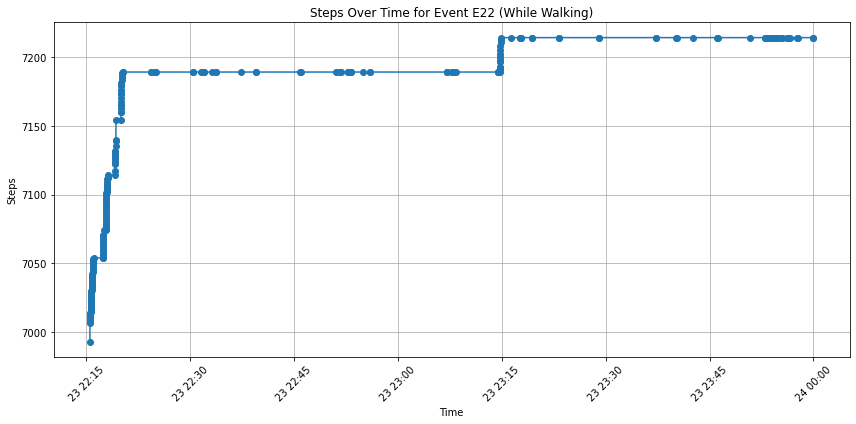

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_e22' is your DataFrame after the previous transformations

# Filter out rows where the step count is zero
df_walking = df_e22[df_e22['Steps'] > 0]

# Plotting Steps vs. Time while the person is walking
plt.figure(figsize=(12, 6))
plt.plot(df_walking['Time'], df_walking['Steps'], marker='o', linestyle='-')
plt.title('Steps Over Time for Event E22 (While Walking)')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
df_e22.head()

,LineId,Time,Component,Content,EventId,EventTemplate,Steps,Date,Hour,Minute
5,6,2017-12-23 22:15:29.635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,6993,2017-12-23,22,15
15,16,2017-12-23 22:15:29.950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7007,2017-12-23,22,15
22,23,2017-12-23 22:15:30.632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7008,2017-12-23,22,15
29,30,2017-12-23 22:15:31.142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7009,2017-12-23,22,15
36,37,2017-12-23 22:15:32.145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7011,2017-12-23,22,15


## Identifying Workout Sessions from Step Count Data

In [38]:
df_e22['Date'] = df_e22['Time'].dt.date
df_e22['Hour'] = df_e22['Time'].dt.hour
df_e22['Minute'] = df_e22['Time'].dt.minute

steps_increase_threshold = 1000
min_duration_minutes = 30

workout_sessions = []
current_session = None

for index, row in df_e22.iterrows():
    if row['Steps'] > steps_increase_threshold:
        if current_session is None:
            current_session = {'start_time': row['Time']}
        else:
            current_session['end_time'] = row['Time']
    else:
        if current_session is not None:
            duration = (current_session['end_time'] - current_session['start_time']).total_seconds() / 60
            if duration >= min_duration_minutes:
                workout_sessions.append(current_session)
            current_session = None

if workout_sessions:
    print("Workout sessions:")
    for session in workout_sessions:
        print(f"Start: {session['start_time']} - End: {session['end_time']}")

Workout sessions:
Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000


## Analysis of Rest Periods Based on Screen-Off Events

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\3834941718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_screen_off['Time'] = pd.to_datetime(df_screen_off['Time'], format='%Y%m%d-%H:%M:%S:%f')


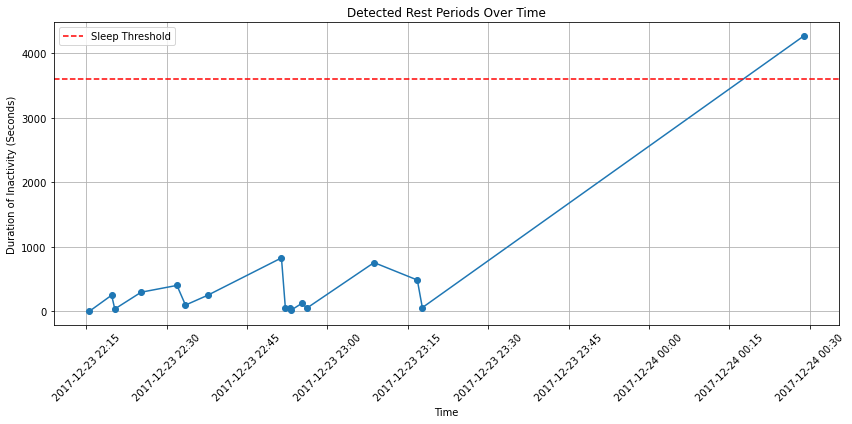

Sleep started at: 2017-12-24 00:28:48.963000


In [16]:
# Filter for screen off events (E40)
df_screen_off = df[df['EventId'] == 'E40']

# Convert 'Time' to datetime
df_screen_off['Time'] = pd.to_datetime(df_screen_off['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Sort by time just in case
df_screen_off = df_screen_off.sort_values(by='Time')

# Detect continuous inactivity periods
df_screen_off['Time_Diff'] = df_screen_off['Time'].diff().dt.total_seconds().fillna(0)
sleep_threshold = 3600  # 1 hour in seconds
df_screen_off['Is_Sleep'] = df_screen_off['Time_Diff'] > sleep_threshold

# Finding sleep start and end times
sleep_periods = df_screen_off[df_screen_off['Is_Sleep']]
sleep_start_times = sleep_periods['Time'].tolist()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_screen_off['Time'], df_screen_off['Time_Diff'], marker='o', linestyle='-')
plt.title('Detected Rest Periods Over Time')
plt.xlabel('Time')
plt.ylabel('Duration of Inactivity (Seconds)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.axhline(y=sleep_threshold, color='r', linestyle='--', label='Sleep Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print sleep start times
for start_time in sleep_start_times:
    print("Sleep started at:", start_time)

## App Usage and Engagement Analysis

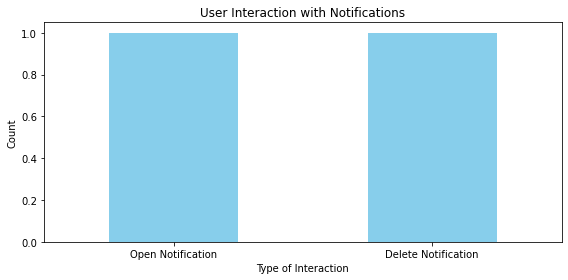

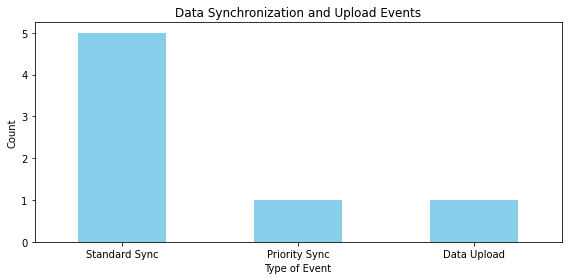

In [61]:
notification_counts.index = ['Open Notification', 'Delete Notification']

# Plotting the notification interactions graph
notification_counts.plot(kind='bar', color='skyblue', figsize=(8, 4))
plt.title('User Interaction with Notifications')
plt.xlabel('Type of Interaction')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To display labels horizontally
plt.tight_layout()
plt.show()
sync_counts.index = ['Standard Sync', 'Priority Sync', 'Data Upload']

# Plotting the data sync and upload events graph
sync_counts.plot(kind='bar', color='skyblue', figsize=(8, 4))
plt.title('Data Synchronization and Upload Events')
plt.xlabel('Type of Event')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Health Data Quality Analysis

### a. Data Quality Checks

<AxesSubplot:>

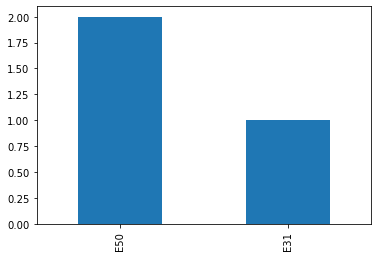

In [30]:
data_quality_events = df[df['EventId'].isin(['E31', 'E50'])]
data_quality_counts = data_quality_events['EventId'].value_counts()
data_quality_counts.plot(kind='bar')

## Time Series Analysis

### a. Event Frequency Over Time

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\2027723906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_events['Time'] = pd.to_datetime(key_events['Time'], format='%Y%m%d-%H:%M:%S:%f')


<AxesSubplot:xlabel='Time'>

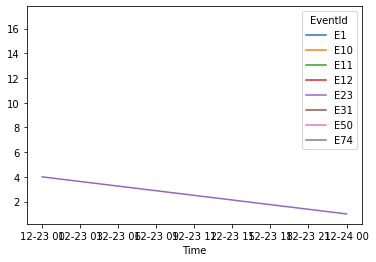

In [32]:
key_events = df[df['EventId'].isin(['E10', 'E11', 'E1', 'E23', 'E74', 'E31', 'E50', 'E12'])]
key_events['Time'] = pd.to_datetime(key_events['Time'], format='%Y%m%d-%H:%M:%S:%f')
key_events.groupby([key_events['Time'].dt.date, 'EventId']).size().unstack().plot(kind='line')

### b. Correlation with Time of Day

<AxesSubplot:xlabel='Time'>

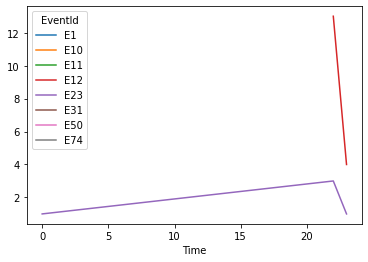

In [33]:
key_events.groupby([key_events['Time'].dt.hour, 'EventId']).size().unstack().plot(kind='line')

In [39]:
df_e4 = df[df['EventId'] == 'E4']
df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)')
df_e4['Calories'] = df_e4['Calories'].astype(int)
df_e4.head()

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\4181997620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)')
C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\4181997620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e4['Calories'] = df_e4['Calories'].astype(int)


,LineId,Time,Component,Content,EventId,EventTemplate,Calories
8,9,20171223-22:15:29:645,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,126775
17,18,20171223-22:15:29:959,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,126797
24,25,20171223-22:15:30:639,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,126818
31,32,20171223-22:15:31:157,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,126861
38,39,20171223-22:15:32:156,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,126882


## Total Calorie Burn Over Time for Event E4(calories burned)

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\344221879.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\344221879.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\344221879.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

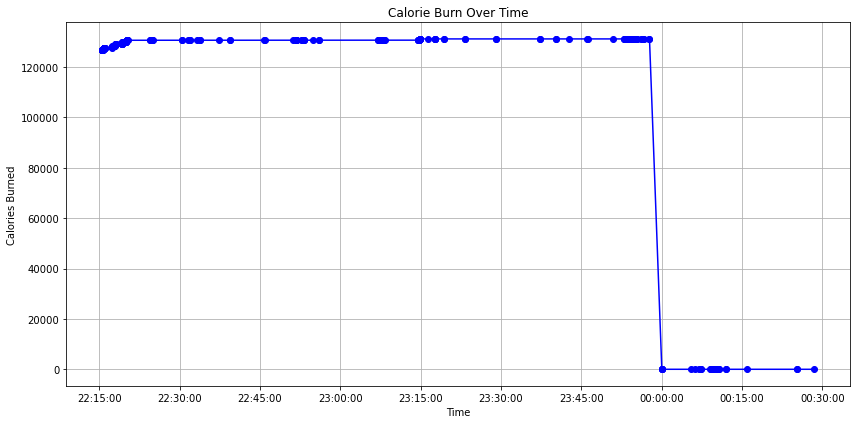

In [46]:
# Assuming df_e4 is defined
df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)')
df_e4['Calories'] = df_e4['Calories'].astype(int)

# Adjust the format string in to_datetime
df_e4['Time'] = pd.to_datetime(df_e4['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_e4['Time'], df_e4['Calories'], marker='o', linestyle='-', color='b')
plt.title('Calorie Burn Over Time')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()


## Calorie Burn Over Time for Event E4, Excluding Inactive Periods

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\1008621727.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IHSAN B P\AppData\Local\Temp\ipykernel_6664\1008621727.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



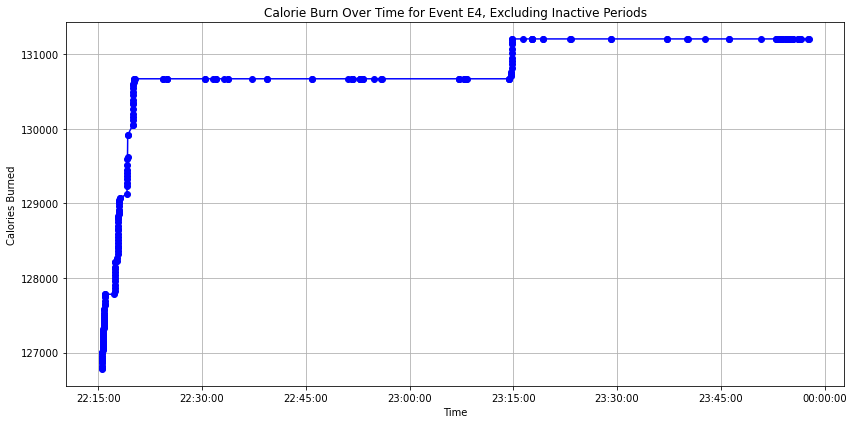

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_e4 is defined
df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)').astype(int)

# Adjust the format string in to_datetime
df_e4['Time'] = pd.to_datetime(df_e4['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Filter out the periods where no calories are burned
df_active_calories = df_e4[df_e4['Calories'] > 0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_active_calories['Time'], df_active_calories['Calories'], marker='o', linestyle='-', color='b')
plt.title('Calorie Burn Over Time for Event E4, Excluding Inactive Periods')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()


# Conclusions

### Steps Counter

The data we have is from 23/12/2017 10.15 PM 29sec 606 milli sec to 24/12/2017 01.02 AM 35 sec 789 milli sec.
that means basically we only have data of 2 hours, 47 minutes, and 6 seconds.
* On December 23, 2017, between 10:15 PM and 11:57 PM, the person accumulated a total of 7,214 steps.
* On December 24, 2017, from midnight to 00:29 AM, no steps were recorded, indicating a period of inactivity.* on 24-12-2017(from 00:00AM to 00:29AM) person's total step count = 0
* After 11:14 PM on December 23, 2017, there were no further steps recorded, suggesting that the person might have been resting or had put their tracking device aside.
* A workout session was identified, starting at 10:15 PM on December 23, 2017, and ending at midnight on December 24, 2017 (specific details referred to in cell 4 of the analysis).
* The person's average number of steps per day is approximately 23,898(approx).


### Summary of Calorie Consumption

* <b>Intensive Caloric Burn on December 23, 2017:</b> Between 10:15 PM and 11:57 PM, the individual burned a total of 131,208 calories, indicating a period of significant physical activity or exercise.
* <b>Period of No Caloric Burn on December 24, 2017:</b> There was no caloric burn recorded from midnight to 00:29 AM, suggesting a time of rest or inactivity.
* <b>Consistent Inactivity Noted Post 11:14 PM:</b> The absence of significant changes in both step count and calorie data after 11:14 PM confirms a period of rest or non-movement, indicating that the person may have ceased physical activity for the day or placed their tracking device in a stationary position.

## Additional Analyses Conducted

In addition to the primary findings detailed in the conclusions section, a series of supplementary analyses were undertaken to provide a more comprehensive review of the dataset. While these analyses have not been included in the main conclusions, they are crucial in understanding the broader context of user behavior and data interaction. These analyses include:

- **App Usage and Engagement Analysis:**
  An in-depth examination of user interactions with notifications, and data synchronization and upload events, aiming to understand user engagement and data management behaviors.

- **Health Data Quality Analysis:**
  A critical assessment of the data quality checks, signified by events E31 and E50, was performed to ensure the integrity and reliability of the health data.

- **Time Series Analysis:**
  Trends and patterns were sought by charting the occurrences of key events over time, taking into account the date and time of their recording.

- **Correlation with Time of Day:**
  The relationship between the timing of events and user behavior was analyzed by correlating event occurrences with different hours of the day.

The rationale for omitting these analyses from the final conclusions is the current ambiguity surrounding the precise implications and meanings of each event type (E10, E11, E1, E23, E74, E31, E50, E12). A deeper interpretive context is needed to derive actionable insights from these events. The results from these additional analyses are documented and will be elaborated upon in future reports once a clearer understanding is achieved.
